In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set
import numpy as np

In [3]:
#Loading the data
b_data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col= 'Date', parse_dates = True)
b_data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [4]:
b_data.columns= ['Total', "East", "West"]
b_data.head()

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [5]:
b_data.describe()

,Total,East,West
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


In [8]:
b_data.isnull().any()

Total    True
East     True
West     True
dtype: bool

In [7]:
b_data.dropna().describe()

,Total,East,West
count,136313.000000,136313.000000,136313.000000
mean,112.975065,51.514060,61.461005
std,143.607191,66.214446,89.406687
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,148.000000,69.000000,75.000000
max,1097.000000,698.000000,850.000000


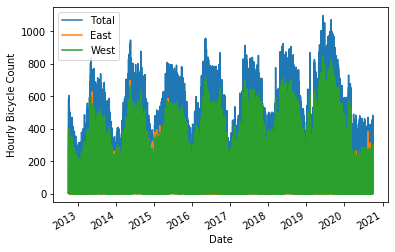

In [9]:
%matplotlib inline
b_data.plot()
plt.ylabel('Hourly Bicycle Count');

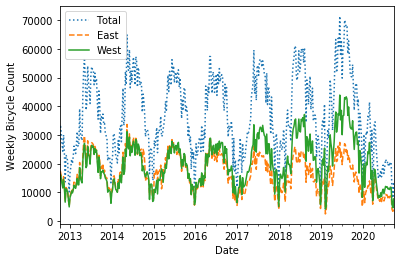

In [10]:
#resample the data and add the hours into weeks
weekly = b_data.resample('W').sum()
weekly.plot(style =[':','--','-'])
plt.ylabel('Weekly Bicycle Count');

In [12]:
b_data.tail(5)

,Total,East,West
Date,,,
2020-09-30 19:00:00,156.0,51.0,105.0
2020-09-30 20:00:00,70.0,27.0,43.0
2020-09-30 21:00:00,40.0,17.0,23.0
2020-09-30 22:00:00,23.0,10.0,13.0
2020-09-30 23:00:00,17.0,4.0,13.0


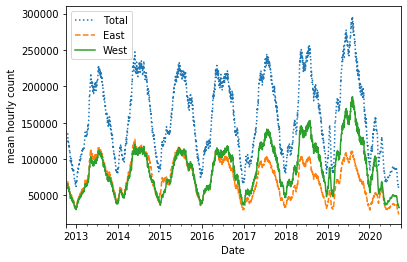

In [11]:
daily= b_data.resample('D').sum()
daily.rolling(30, center= True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count');

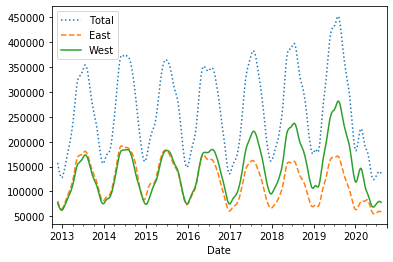

In [12]:
daily.rolling(100, center= True, 
              win_type='gaussian').sum(std=20).plot(style=[':','--','-']);

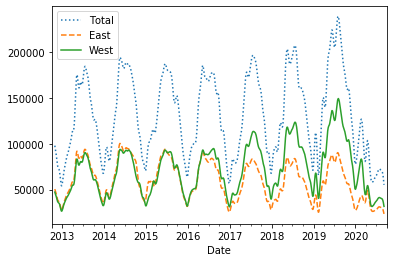

In [13]:
#what makes the difference is the std sum to collapse more of the width
daily.rolling(50, center= True, 
              win_type='gaussian').sum(std=10).plot(style=[':','--','-']);

In [20]:
#average traffic as a function of the time of day/
#at different times in the day

by_time = b_data.groupby(b_data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6) #converted to seconds
hourly_ticks

array([    0, 14400, 28800, 43200, 57600, 72000])

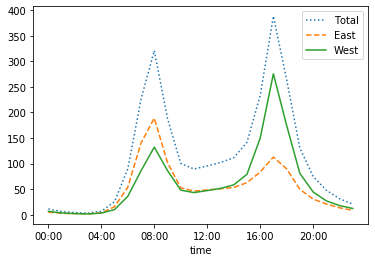

In [21]:
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);
#rate of bicycle count every 4 hours for 6 intervals

* I think this plot now shows that more people are leaving downtown seattle and coming back in the evening... Unlike a 2016 analysis which showed otherwise. Does this mean, downtown seattle has become more residential than industrial? and more people are working out of the area than in the area?

* This observation is because the eastern side walk is generally used to leave downtown seattle and the western, to go towards downtown seattle.

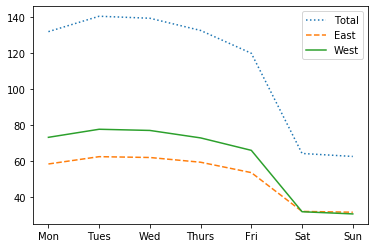

In [27]:
#by day of the week
by_weekday = b_data.groupby(b_data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'] 
#this labels the default 0-6 representation of the weekday
by_weekday.plot(style=[':', '--', '-']);

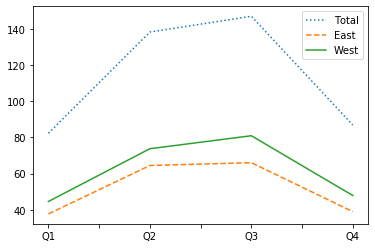

In [28]:
by_quarter = b_data.groupby(b_data.index.quarter).mean()
by_quarter.index = ['Q1', 'Q2', 'Q3', 'Q4']
by_quarter.plot(style=[":",'--','-']);

#I noted the quarter attribute from the list of attributes, and methods in the index method

In [29]:
weekend = np.where(b_data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = b_data.groupby([weekend, b_data.index.time]).mean()

In [25]:
b_data.index? #thid provides a list of attribute and methods that can work with the index function.
#which can be very very useful for EDA and decision support

In [30]:
np.where?
#Return elements chosen from `x` or `y` depending on `condition`

In [31]:
by_time.ix?

Object `by_time.ix` not found.


In [33]:
#try to figure this out: plots of weekday beside the visuals of weekends agg.
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);

SyntaxError: invalid syntax (<ipython-input-33-bf4130896ab8>, line 2)

In [36]:
nrows, ncols = 100000, 100
rng = np.random.RandomState(42)
df1, df2, df3, df4 = (pd.DataFrame(rng.rand(nrows, ncols))
                      for i in range(4))

In [37]:
%timeit df1 + df2 + df3 + df4

382 ms ± 24 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [38]:
%timeit pd.eval('df1 + df2 + df3 + df4')
#much faster, less memory consuming query method

191 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
np.allclose?
#Returns True if the two arrays are equal within the given, tolerance; False otherwise.

* pd.eval(), query function, supports arithemetic operators, comparison operators, bitwise operators(&,|), object att. and indices, conditional statements, loops etc.
* Also works in a DataFrame too

In [41]:
np.allclose(df1 + df2 + df3 + df4, 
            pd.eval('df1 + df2 + df3 + df4'))

True

In [42]:
#bitwise operations
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
result2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,True,False,False,False,True,True,True,True,True,True,...,True,False,False,False,True,False,True,True,True,True
1,True,True,True,False,False,True,True,True,True,True,...,True,False,True,False,True,False,True,False,False,False
2,True,True,True,True,True,False,False,False,True,False,...,True,True,True,True,False,False,False,True,True,False
3,True,False,True,True,True,False,True,False,True,True,...,False,False,True,False,True,False,True,True,True,False
4,True,False,True,False,False,False,True,True,False,True,...,True,True,True,True,False,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,True,False,False,False,False,...,True,True,True,False,True,True,True,False,True,False
99996,True,True,True,False,True,True,False,True,False,True,...,False,True,True,True,True,True,False,True,False,True
99997,False,True,True,False,False,True,True,True,True,False,...,True,False,False,True,True,True,True,True,True,True
99998,True,True,True,False,False,True,False,False,True,False,...,True,False,False,False,True,True,True,True,True,True
